In [1]:
import numpy as np
import pandas as pd

## 1. Generate or Load Data:
- Generate a synthetic dataset with the following columns:
    - experience: Years of experience (integer values, e.g., 1 to 20).
    - education_level: Education level (1 for Bachelor's, 2 for Master's, 3 for PhD).
    - salary: Continuous salary value (target variable).

In [12]:
# Generate synthetic data
# Education level (1 for Bachelor's, 2 for Master's, 3 for PhD)
np.random.seed(42)
experience = np.random.randint(1, 21, size = 200)
education_level = np.random.choice([1, 2, 3], size = 200)
salary = (experience * 5000) + (education_level * 10000) + np.random.normal(0, 5000, 200)

In [13]:
# Create DataFrame
df = pd.DataFrame({
    'experience': experience,
    'education_level': education_level,
    'salary': salary
})

df.head()

,experience,education_level,salary
0,7,2,63906.455385
1,20,3,126612.921661
2,15,3,97255.856601
3,11,3,83284.354679
4,8,3,70919.277572


## 2. Data Preprocessing:
- Split the dataset into features (experience, education_level) and target (salary).
- Perform an 80/20 split to create training and test datasets.

In [14]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df[['experience', 'education_level']]
y = df['salary']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 3. Train the Linear Regression Model:
- Train a Linear Regression model on the training data.

In [15]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 4. Evaluate the Model:
- Evaluate the model on the test data using

    - Mean Squared Error (MSE) and
    - R-squared (R²) values.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 31384935.768038433
R-squared: 0.9647497916288801


## 5. Make Predictions:
- Use the trained model to predict the salary of a new employee.
- Example: Predict the salary for an employee with 7 years of experience and a Master's degree (education level = 2).

In [17]:
# New employee data
new_employee = np.array([[7, 2]])  # 7 years of experience, Master's degree
predicted_salary = model.predict(new_employee)

print(f"Predicted Salary for 7 years experience and Master's degree: ${predicted_salary[0]:,.2f}")

Predicted Salary for 7 years experience and Master's degree: $55,031.31


/Users/anisha/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 6. Visualizations (Optional):
- Create scatter plots to visualize the relationship between experience, education, and salary.
- Plot the model's predictions against the actual salary data.

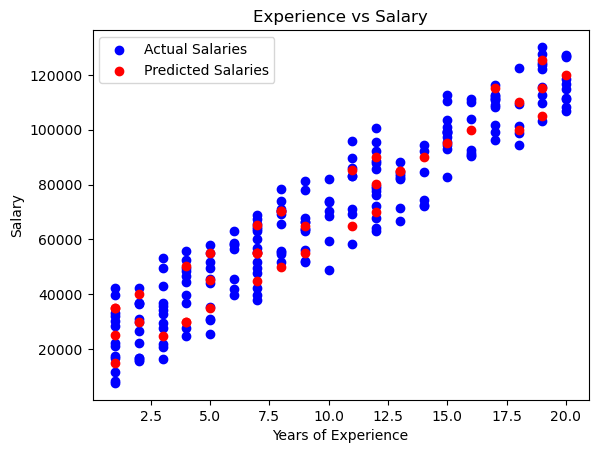

In [18]:
import matplotlib.pyplot as plt

# Scatter plot for experience vs salary
plt.scatter(df['experience'], df['salary'], color='blue', label='Actual Salaries')
plt.scatter(X_test['experience'], y_pred, color='red', label='Predicted Salaries')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.legend()
plt.show()